<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#项目介绍" data-toc-modified-id="项目介绍-1">项目介绍</a></span></li>
    <li><span><a href="#哪些类别比较畅销?" data-toc-modified-id="哪些类别比较畅销?-2">哪些类别比较畅销?</a></span></li>
    <li><span><a href="#哪些商品比较畅销?" data-toc-modified-id="哪些商品比较畅销?-3">哪些商品比较畅销?</a></span></li>
    <li><span><a href="#不同门店的销售额占比" data-toc-modified-id="不同门店的销售额占比-4">不同门店的销售额占比</a></span></li>
    <li><span><a href="#哪个时间段是超市的客流高封期?" data-toc-modified-id="哪个时间段是超市的客流高封期?-5">哪个时间段是超市的客流高封期?</a></span></li>
</ul></div>

# 项目介绍

近些年来，国内大型连锁超市如雨后春笋般迸发，对于各个超市来说，竞争压力不可谓不大，为了拓展、保留客户，各种促销手段应运而生。

以下为国内某连锁超市的成交统计数据，针对于该数据，挖掘其中价值，为该超市的促销手段提供技术支持。

In [8]:
import pandas as pd 
from datetime import datetime

#导入数据源，parse_dates：将时间字符串转为日期时间格式
data = pd.read_csv("order-14.3.csv",parse_dates = ["成交时间"],encoding = 'gbk')
print(data.shape)
data.head(5)

(3478, 7)


,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759


# 哪些类别比较畅销

In [9]:
data.groupby("类别ID")["销量"].sum().reset_index().sort_values(by = "销量",ascending = False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


# 哪些商品比较畅销？

In [10]:
pd.pivot_table(data,index = "商品ID",values = "销量",aggfunc = "sum").reset_index().sort_values(by = "销量",ascending = False).head(10)

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


# 不同门店的销售额占比

In [15]:
data["销售额"] = data["销量"]*data["单价"]

#不同某店销售
print(data.groupby("门店编号")["销售额"].sum()) 

#不同门店的销售额占比
dfbb = data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()
dfbb = dfbb.reset_index()  # 将索引转为列
dfbb.columns = ["门店编号", "销售额占比"]  # 重命名列

dfbb

门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64


,门店编号,销售额占比
0,CDLG,0.376815
1,CDNL,0.278392
2,CDXL,0.344792


<Axes: ylabel='销售额'>

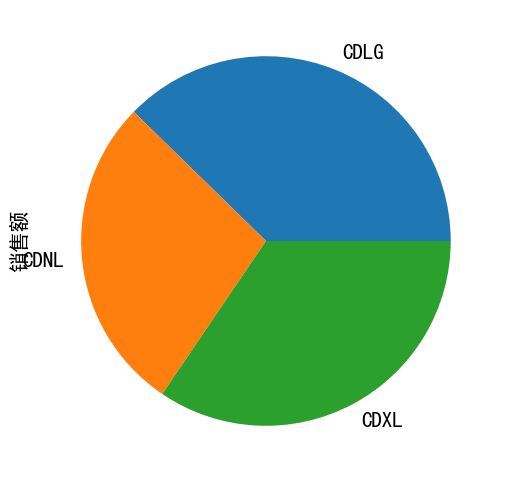

In [23]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = (6.0,6.0)    # 设置figure_size尺寸
plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来设置字体样式以正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号
plt.rcParams['font.size'] = 15

(data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()).plot.pie()

# 哪个时间段是超市的客流高峰期

<Axes: xlabel='小时'>

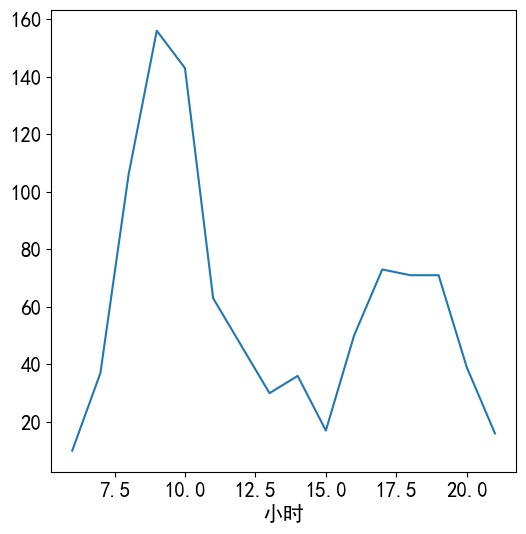

In [26]:
# 利用自定义时间格式函数strftime提取小时数
data["小时"] = data["成交时间"].map(lambda x:int(x.strftime("%H")))

#对小时和订单去重
traffic = data[["小时","订单ID"]].drop_duplicates()

#求每小时的客流量
traffic.groupby("小时")["订单ID"].count().plot()